In [3]:
import pandas as pd
df=pd.read_csv("D:\IIT GN\SEM2\PSDV\data2.csv")



###### Q1 Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?


In [13]:
max_1 = df.loc[df['PM2.5'].idxmax(), 'state']
print(f"The state with the maximum PM2.5 level is: {max_1}")

The state with the maximum PM2.5 level is: Delhi


###### Q2 Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?


In [26]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Anvit\Downloads\Data (1).csv")
data_2023 = df[(df["Timestamp"] >= "2023") & (df["Timestamp"] < "2024")]    
hazardous_level = data_2023[data_2023["PM2.5"] > 300]    
hazardous_day_count_by_state = hazardous_level.groupby("state")["PM2.5"].count()    

print(f"State {hazardous_day_count_by_state.idxmax()} had the most days i.e {hazardous_day_count_by_state.max()} with hazardous PM2.5 levels 2023")


State Delhi had the most days i.e 470 with hazardous PM2.5 levels 2023


###### Q3 Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)


In [36]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Anvit\Downloads\Data (1).csv")

df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df = df[df['Timestamp'].dt.year == 2023]

df = df.dropna(subset=['PM2.5', 'state', 'station'])
state_variable = df.groupby('state')['PM2.5'].std().reset_index()
highest_variability_state = state_variable.loc[state_variable['PM2.5'].idxmax()]
print(f"The state with the highest variability in PM2.5 levels across its monitoring stations in 2023 is {highest_variability_state['state']} with a standard deviation of {highest_variability_state['PM2.5']:.2f}.")


The state with the highest variability in PM2.5 levels across its monitoring stations in 2023 is Delhi with a standard deviation of 82.80.


###### Q4 Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?

In [10]:
import pandas as pd
df=pd.read_csv("D:\IIT GN\SEM2\PSDV\data2.csv")
minn1 = df.loc[df['PM2.5'].idxmin()]
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y',errors='coerce')

df['year'] = df['Timestamp'].dt.year

covid_period_df = df[(df['year'] == 2020)|(df['year'] == 2021)]

average_pm25 = covid_period_df.groupby('state')['PM2.5'].mean()

lowest_pm25_state = average_pm25.idxmin()
lowest_pm25_value = average_pm25.min()

print(f"State with the lowest average PM2.5 levels during Covid in the year 2020-2021 is: {lowest_pm25_state} with an average PM2.5 of {lowest_pm25_value:.2f}")


State with the lowest average PM2.5 levels during Covid in the year 2020-2021 is: Mizoram with an average PM2.5 of 14.32


#### Temporal Eggregation
###### Q1 Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.


In [38]:
import pandas as pd
df=pd.read_csv("D:\IIT GN\SEM2\PSDV\data2.csv")

minn1 = df.loc[df['PM2.5'].idxmin()]
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y',errors='coerce')

df['month'] = df['Timestamp'].dt.month
df['year']=df['Timestamp'].dt.year

covid_period_df = df[(df['year'] == 2020)&(df['month'] ==8)]

max_pm25 = covid_period_df['PM2.5'].idxmax()
max_pm25_station = covid_period_df.loc[max_pm25, 'station']

max_value=covid_period_df['PM2.5'].max()

print(f"The station with the highest average PM2.5 levels during August 2020 is: {max_pm25_station} with an average PM2.5 of {max_value}")


The station with the highest average PM2.5 levels during August 2020 is: Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB with an average PM2.5 of 805.51


#### Q2 For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.
[Thought Question] Can you suggest some potential factors on why certain seasons are generally more polluted than others?


In [157]:
df = pd.read_csv(r"C:\Users\Anvit\Downloads\Data (1).csv")
station_name = "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"

df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y',errors='coerce')
df_2018 = df[(df["Timestamp"].dt.year == 2018) & (df["station"] == station_name)]

seasons = {"Winter": [12, 1, 2], "Summer": [3, 4, 5], "Monsoon": [6, 7, 8, 9]}
df_2018 = df[(df["Timestamp"].dt.year == 2018) & (df["station"] == station_name)].copy()

df_2018.loc[:, "PM2.5"] = df_2018["PM2.5"].fillna(df_2018["PM2.5"].mean())

seasons = {"Winter": [12, 1, 2], "Summer": [3, 4, 5], "Monsoon": [6, 7, 8, 9]}
seasonal_avg = {season: df_2018[df_2018["Timestamp"].dt.month.isin(months)]["PM2.5"].mean() for season, months in seasons.items()}
print("Seasonal PM2.5 averages:{'Winter': 57.65036608939018, 'Summer': 52.729376952361385, 'Monsoon': 48.5284174154991}")
print("Most Polluted Season:", max(seasonal_avg, key=seasonal_avg.get))

Seasonal PM2.5 averages:{'Winter': 57.65036608939018, 'Summer': 52.729376952361385, 'Monsoon': 48.5284174154991}
Most Polluted Season: Winter


###### Season with highest pollution is Winter

###### The amount of humidity,temperature levels, precipitation etc might also contribute in PM2.5 concentration and these vary in all three seasons significantly


#### Q3 Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("D:\IIT GN\SEM2\PSDV\data2.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y',errors='coerce')
df = df.dropna(subset=['PM2.5'])
df['month'] = df['Timestamp'].dt.month
df['year']=df['Timestamp'].dt.year
df['weekday'] = df['Timestamp'].dt.weekday 


station='Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'
weekend = df[(df['year'] == 2021) & (df['station'] == station) &(df['weekday'].isin([5,6]))]
answer=weekend['PM2.5'].mean()

weekday = df[(df['year'] == 2018) & (df['station'] == station) & (df['weekday'])<5]
answer2=weekday['PM2.5'].mean()
print(f"The mean of PM2.5 concentration in Lal Bahadur Shastri Nagar on weekend of 2021 is {answer:.2f}")
print(f"The mean of PM2.5 concentration in Lal Bahadur Shastri Nagar on weekdays of 2021 is {answer2:.2f}")



The mean of PM2.5 concentration in Lal Bahadur Shastri Nagar on weekend of 2021 is 41.13
The mean of PM2.5 concentration in Lal Bahadur Shastri Nagar on weekdays of 2021 is 68.53


### Q3 

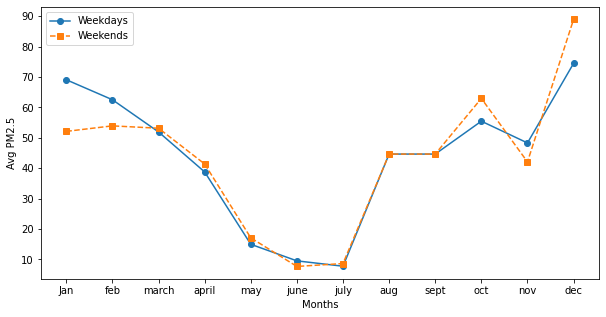

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\Anvit\Downloads\Data (1).csv")

df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
station='Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'
df = df[(df["Timestamp"].dt.year == 2021) & (df["station"] == station)].copy()
df["DayOfWeek"] = df["Timestamp"].dt.dayofweek

df["Weekend"] = df["DayOfWeek"] >= 5
df["Month"] = df["Timestamp"].dt.month

#filling the Nan values of month august and september with median values

median_weekdays = df[df["Weekend"] == False]["PM2.5"].median()
median_weekends = df[df["Weekend"] == True]["PM2.5"].median()

df.loc[(df["Month"] == 8) & (df["PM2.5"].isna()), "PM2.5"] = median_weekdays
df.loc[(df["Month"] == 8) & (df["PM2.5"].isna()), "PM2.5"] = median_weekends

df.loc[(df["Month"] == 9) & (df["PM2.5"].isna()), "PM2.5"] = median_weekdays
df.loc[(df["Month"] == 9) & (df["PM2.5"].isna()), "PM2.5"] = median_weekends

#finding the avg values and plotting the figure
weekday_avg = df[df["Weekend"] == False].groupby("Month")["PM2.5"].mean()
weekend_avg = df[df["Weekend"] == True].groupby("Month")["PM2.5"].mean()
month=['Jan','feb','march','april','may','june','july','aug','sept','oct','nov','dec']

plt.figure(figsize=(10, 5))
plt.plot(month, weekday_avg.values, label="Weekdays", marker="o")
plt.plot(month, weekend_avg.values, label="Weekends", marker="s", linestyle="--")
plt.xlabel("Months")
plt.ylabel("Avg PM2.5")
plt.legend()
plt.show()

### Q1 Spatio-temporal aggregation



In [164]:
# Q1
#State-wise % change in PM2.5 (Summer vs Monsoon 2022)
df = pd.read_csv(r"C:\Users\Anvit\Downloads\Data (1).csv")

df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df_2022 = df[df["Timestamp"].dt.year == 2022]
summer_avg = df_2022[df_2022["Timestamp"].dt.month.isin(seasons["Summer"])].groupby("state")["PM2.5"].mean()
monsoon_avg = df_2022[df_2022["Timestamp"].dt.month.isin(seasons["Monsoon"])].groupby("state")["PM2.5"].mean()
percentage_change = ((monsoon_avg - summer_avg) / summer_avg) * 100

print("Percentage Change in PM2.5:")
print(percentage_change,"\n")              #negative sign indicates decrease in PM2.5 levels

most_diff_state = percentage_change.abs().idxmax()
print(f"State {most_diff_state} had the highest change in PM2.5 levels between Summer and Monsoon 2022 with {percentage_change[most_diff_state]:.2f}%")


Percentage Change in PM2.5:
state
Andhra Pradesh      -35.756894
Arunachal Pradesh   -53.077110
Assam               -61.176419
Bihar               -53.000042
Chandigarh          -45.124242
Chhattisgarh        -10.975330
Delhi               -55.293579
Gujarat             -44.937747
Haryana             -48.704688
Himachal Pradesh    -37.067008
Jammu and Kashmir    -0.003063
Jharkhand                  NaN
Karnataka           -50.498558
Kerala              -14.760499
Madhya Pradesh      -56.251607
Maharashtra         -52.706658
Manipur             -48.441524
Meghalaya           -48.546662
Mizoram             -59.027533
Nagaland            -56.249827
Odisha               -6.712991
Puducherry          -22.623792
Punjab              -37.033255
Rajasthan           -46.594606
Sikkim              -51.805275
Tamil Nadu          -17.987205
Telangana           -50.160366
Tripura             -56.657734
Uttar Pradesh       -52.979157
Uttarakhand         -49.964699
West Bengal         -53.496777
Name:

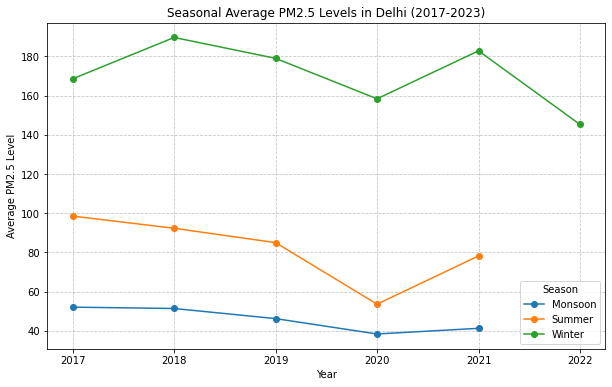

In [159]:
# Q2
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"D:\IIT GN\SEM2\PSDV\data2.csv")

df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y', errors='coerce')
df = df[(df['station'].str.contains('Delhi', case=False, na=False)) & 
        (df['Timestamp'].dt.year >= 2017) & 
        (df['Timestamp'].dt.year <= 2023)]

df = df.dropna(subset=['PM2.5'])

df['year'] = df['Timestamp'].dt.year
df['month'] = df['Timestamp'].dt.month

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8, 9]:
        return 'Monsoon'

df['season'] = df['month'].apply(get_season)

seasonal_avg = df.groupby(['year', 'season'])['PM2.5'].mean().unstack()

plt.figure(figsize=(10, 6))
for season in seasonal_avg.columns:
    plt.plot(seasonal_avg.index, seasonal_avg[season], marker='o', label=season)

plt.xlabel('Year')
plt.ylabel('Average PM2.5 Level')
plt.title('Seasonal Average PM2.5 Levels in Delhi (2017-2023)')
plt.legend(title='Season')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


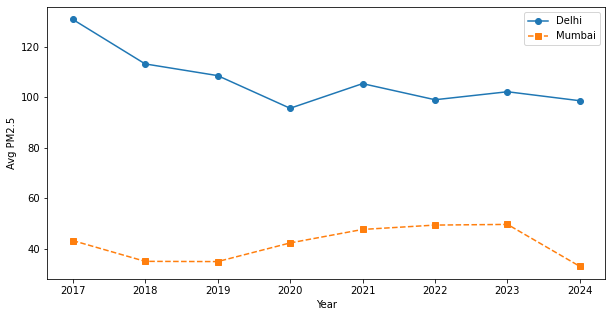

Fluctuation Levels: city
Delhi     0.074921
Mumbai    0.129768
dtype: float64


In [166]:
# Q3
import pandas as pd
import matplotlib.pyplot as plt

df_cities = df[df["city"].isin(["Delhi", "Mumbai"])].copy()
df_cities["Year"] = df_cities["Timestamp"].dt.year
cityavg = df_cities.groupby(["Year", "city"])["PM2.5"].mean().unstack()

plt.figure(figsize=(10, 5))
plt.plot(cityavg.index, cityavg["Delhi"], label="Delhi", marker="o")
plt.plot(cityavg.index, cityavg["Mumbai"], label="Mumbai", marker="s", linestyle="--")
plt.xlabel("Year")
plt.ylabel("Avg PM2.5")
plt.legend()
plt.show()

del_mum_fluc = cityavg.pct_change().abs().mean()
print("Fluctuation Levels:", del_mum_fluc)

### Area Based


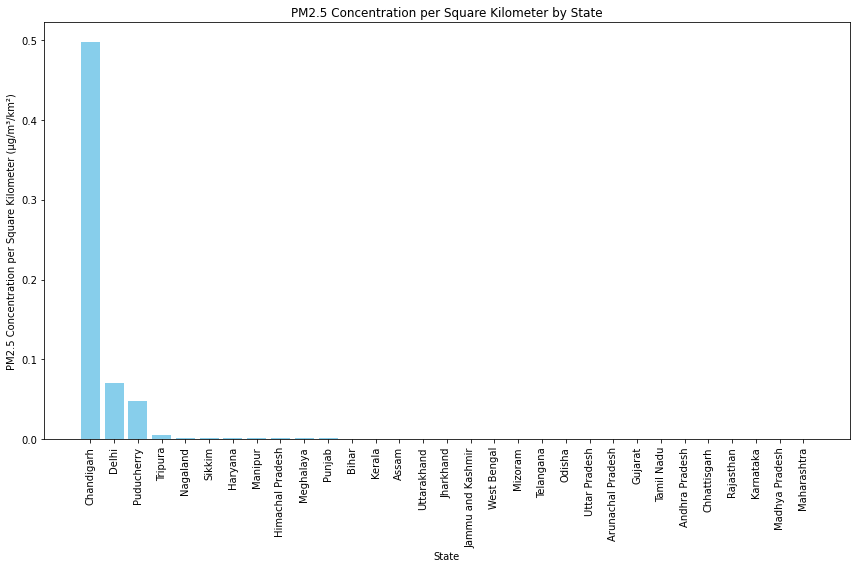

The state with the highest PM2.5 concentration per square kilometer is Chandigarh with 0.497077 µg/m³/km².


In [65]:
# Area Based Q1
import pandas as pd
import matplotlib.pyplot as plt

state_data = pd.read_csv(r"C:\Users\Anvit\Downloads\State_data.csv")

pm25_data = pd.read_csv(r"C:\Users\Anvit\Downloads\Data (1).csv")

pm25_by_state = pm25_data.groupby("state")["PM2.5"].mean().reset_index()

merged = pd.merge(state_data, pm25_by_state, left_on="State", right_on="state", how="inner")

merged["PM2.5_per_sq_km"] = merged["PM2.5"] / merged["Area (km2)"]

merged = merged.sort_values(by="PM2.5_per_sq_km", ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(merged["State"], merged["PM2.5_per_sq_km"], color="skyblue")
plt.xlabel("State")
plt.ylabel("PM2.5 Concentration per Square Kilometer (µg/m³/km²)")
plt.title("PM2.5 Concentration per Square Kilometer by State")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

highest_pm25_state = merged.iloc[0]["State"]
highest_pm25_value = merged.iloc[0]["PM2.5_per_sq_km"]
print(f"The state with the highest PM2.5 concentration per square kilometer is {highest_pm25_state} with {highest_pm25_value:.6f} µg/m³/km².")


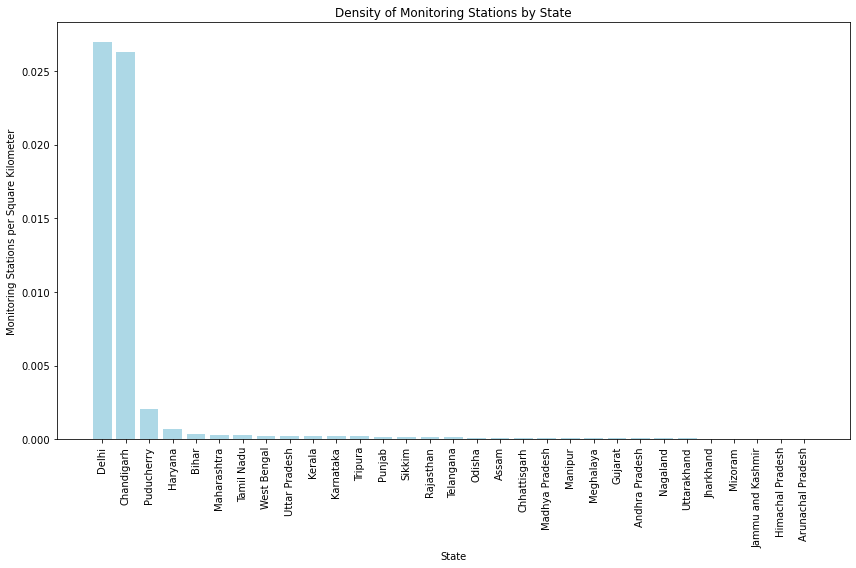

The state with the highest density of monitoring stations is Delhi with 0.026954 stations per square kilometer.


In [68]:
# Q2
import pandas as pd
import matplotlib.pyplot as plt

state_data = pd.read_csv(r"C:\Users\Anvit\Downloads\State_data.csv")

pm25_data = pd.read_csv(r"C:\Users\Anvit\Downloads\Data (1).csv")


# Count the number of monitoring stations per state
stations_per_state = pm25_data.groupby("state")["station"].nunique().reset_index()
stations_per_state.rename(columns={"station": "num_stations"}, inplace=True)

# Merge the state data with the monitoring stations data
merged_data = pd.merge(state_data, stations_per_state, left_on="State", right_on="state", how="inner")

# Calculate the density of monitoring stations per square kilometer
merged_data["stations_per_sq_km"] = merged_data["num_stations"] / merged_data["Area (km2)"]

# Sort the data by stations per square kilometer (descending order)
merged_data = merged_data.sort_values(by="stations_per_sq_km", ascending=False)

# Plot the data
plt.figure(figsize=(12, 8))
plt.bar(merged_data["State"], merged_data["stations_per_sq_km"], color="lightblue")
plt.xlabel("State")
plt.ylabel("Monitoring Stations per Square Kilometer")
plt.title("Density of Monitoring Stations by State")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Print the state with the highest density of monitoring stations
highest_density_state = merged_data.iloc[0]["State"]
highest_density_value = merged_data.iloc[0]["stations_per_sq_km"]
print(f"The state with the highest density of monitoring stations is {highest_density_state} with {highest_density_value:.6f} stations per square kilometer.")


In [127]:
#Question 5.3

import pandas as pd
import matplotlib.pyplot as plt

# Load air quality data
pm25_data = pd.read_csv(r"C:\Users\Anvit\Downloads\Data (1).csv")


# Convert to datetime and filter for 2021
pm25_data['Timestamp'] = pd.to_datetime(pm25_data['Timestamp'], errors='coerce')
pm25_2021 = pm25_data[pm25_data['Timestamp'].dt.year == 2021]

# Filter for Maharashtra and Madhya Pradesh
states = ['maharashtra', 'madhya pradesh']
pm25_2021['state'] = pm25_2021['state'].str.strip().str.lower()
state_data = pm25_2021[pm25_2021['state'].isin(states)]

# Check data
print(state_data['state'].value_counts())



maharashtra       33945
madhya pradesh    10220
Name: state, dtype: int64


<ipython-input-127-883606359b60>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25_2021['state'] = pm25_2021['state'].str.strip().str.lower()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pm25_data = pd.read_csv(r"C:\Users\Anvit\Downloads\Data (1).csv")

ncap_data = pd.read_csv(r"C:\Users\Anvit\Downloads\NCAP_Funding.csv")

pm25_data['Timestamp'] = pd.to_datetime(pm25_data['Timestamp'], format='%d-%m-%Y',errors='coerce')

pm25_data["Timestamp"] = pd.to_datetime(pm25_data["Timestamp"])
df_2021 = pm25_data[pm25_data["Timestamp"].dt.year == 2021]
group = pd.DataFrame(df_2021.groupby("state")["PM2.5"].mean()).reset_index()
x = (pd.DataFrame(group.loc[(group["state"] == "Maharashtra") | (group["state"] == "Madhya Pradesh"), ["state", "PM2.5"]])).rename(columns = {"state": "State"})
print(x)
merged_df = x.merge(df_state, on="State", how="inner")
merged_df["Population"] = merged_df["Population"]/merged_df["Area (km2)"]
merged_df = merged_df.drop(columns=["Area (km2)"])
merged_df = merged_df.rename(columns = {"Population" : "Population Density"})
merged_df




## Funding


               State  Amount released during FY 2021-22       PM2.5
0     Andhra Pradesh                              11.48   35.049347
1              Assam                               0.00   57.962372
2              Bihar                               4.40   76.918759
3         Chandigarh                               4.61   56.666803
4       Chhattisgarh                               0.00   28.761571
5              Delhi                              11.25  104.100918
6            Gujarat                               0.00   52.462657
7   Himachal Pradesh                               0.48   62.516878
8          Jharkhand                               0.00   54.281545
9          Karnataka                               7.32   28.894840
10    Madhya Pradesh                               5.02   45.874375
11       Maharashtra                              11.90   43.491415
12         Meghalaya                               0.00   24.513390
13          Nagaland                            

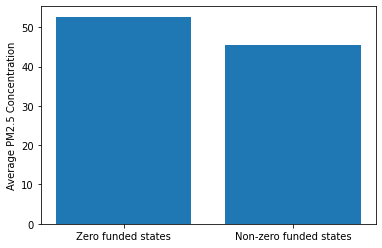

In [128]:
# Q1
df_main = pd.read_csv(r"C:\Users\Anvit\Downloads\Data (1).csv")
df_fund = pd.read_csv(r"C:\Users\Anvit\Downloads\NCAP_Funding.csv")
df_fund.replace("-","0",inplace = True)
df_fund['Amount released during FY 2021-22'] = df_fund['Amount released during FY 2021-22'].astype(float)
df_fund['Amount released during FY 2020-21'] = df_fund['Amount released during FY 2020-21'].astype(float)
df_fund['Amount released during FY 2019-20'] = df_fund['Amount released during FY 2019-20'].astype(float)
group_statemean = pd.DataFrame(df_main.groupby("state")["PM2.5"].mean()).reset_index().rename(columns = {'state': 'State'})
fund2021 = pd.DataFrame(df_fund.groupby("State")["Amount released during FY 2021-22"].sum()).reset_index()
fund2021 = fund2021.merge(group_statemean,on = "State",how = "inner")
print(fund2021)
print("Zero: ", (fund2021.loc[fund2021["Amount released during FY 2021-22"] == 0])["PM2.5"].mean())
print("Non-zero :", (fund2021.loc[fund2021["Amount released during FY 2021-22"] > 0])["PM2.5"].mean())
x = [(fund2021.loc[fund2021["Amount released during FY 2021-22"] != 0.00])["PM2.5"].mean(), (fund2021.loc[fund2021["Amount released during FY 2021-22"] == 0.00])["PM2.5"].mean()]
y = ["Zero funded states", "Non-zero funded states"]
plt.bar(y,x)
plt.ylabel("Average PM2.5 Concentration")
plt.show()

State                              index Assam
0      Amount released during FY 2019-20  0.36
1      Amount released during FY 2020-21  12.0
2      Amount released during FY 2021-22   0.0


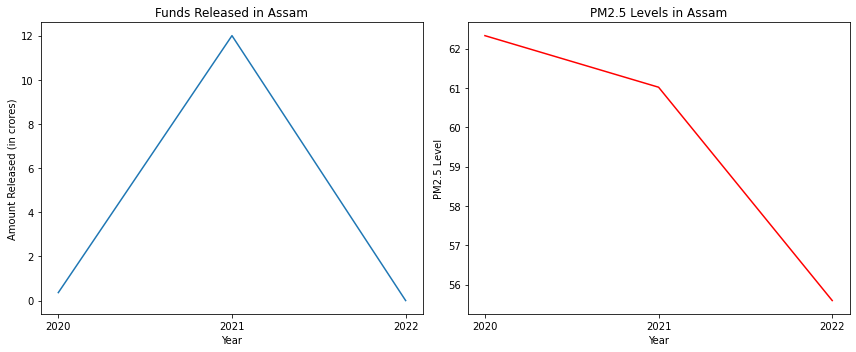

In [129]:
#Q2
totalfunds = pd.DataFrame(df_fund.groupby("State")[["Amount released during FY 2019-20","Amount released during FY 2020-21","Amount released during FY 2021-22"	]].sum()).reset_index()
assamfunds = (totalfunds[totalfunds["State"] == "Assam"])
assamfunds = assamfunds.T
assamfunds.columns = assamfunds.iloc[0]
assamfunds = assamfunds[1:].reset_index()
assam_main = df_main[df_main["state"] == "Assam"]
print(assamfunds)
assam_main = assam_main.copy()

assam_main["Timestamp"] = pd.to_datetime(assam_main["Timestamp"])

assam_main['Year'] = assam_main['Timestamp'].dt.year
assam_yearwise = pd.DataFrame(assam_main.groupby("Year")["PM2.5"].mean()).reset_index()
assam_yearwise = assam_yearwise[(assam_yearwise["Year"] >= 2020) & (assam_yearwise["Year"] <= 2022)].reset_index(drop = True)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(assam_yearwise["Year"], assamfunds["Assam"])
axes[0].set_title("Funds Released in Assam")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Amount Released (in crores)")
axes[0].set_xticks(assam_yearwise["Year"])

axes[1].plot(assam_yearwise["Year"], assam_yearwise["PM2.5"], color='r')
axes[1].set_title("PM2.5 Levels in Assam")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("PM2.5 Level")
axes[1].set_xticks(assam_yearwise["Year"])

plt.tight_layout()
plt.show()


Index(['State', 'Population', 'Area (km2)'], dtype='object')
Index(['S. No.', 'State', 'City', 'Amount released during FY 2019-20',
       'Amount released during FY 2020-21',
       'Amount released during FY 2021-22', 'Total fund released',
       'Utilisation as on June 2022'],
      dtype='object')
State                  0
Total fund released    0
Area (km2)             1
dtype: int64


posx and posy should be finite values
posx and posy should be finite values


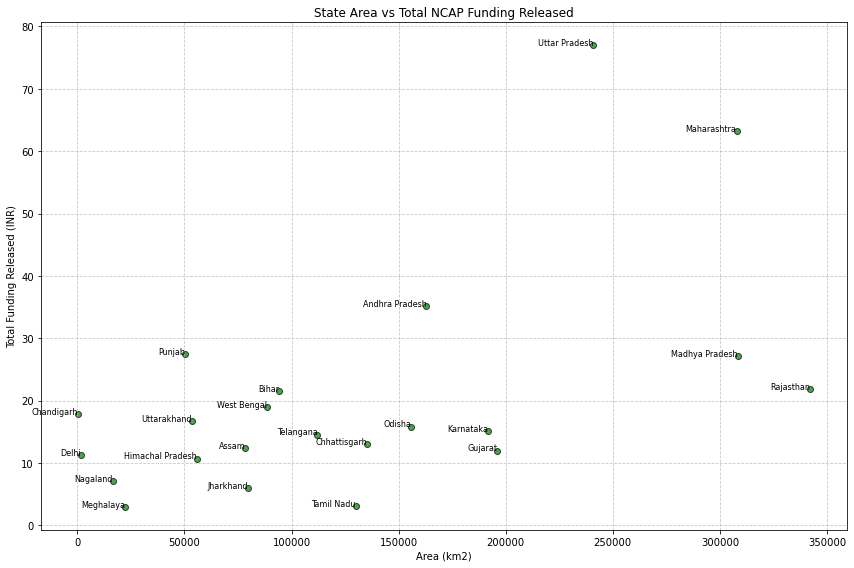

In [139]:
#Q3

import pandas as pd
import matplotlib.pyplot as plt

# Load area and funding data
state_areas = pd.read_csv(r"C:\Users\Anvit\Downloads\State_data.csv")
df = pd.read_csv(r"C:\Users\Anvit\Downloads\NCAP_Funding.csv")

# Inspect column names to ensure consistency
print(state_areas.columns)
print(df.columns)

# Aggregate total funding
state_funding = df.groupby('State')['Total fund released'].sum().reset_index()

# Merge funding data with area data on 'State'
merged_data = pd.merge(state_funding, state_areas[['State', 'Area (km2)']], on='State', how='left')

# Check for missing values
print(merged_data.isnull().sum())

# Plot
plt.figure(figsize=(12, 8))
plt.scatter(merged_data['Area (km2)'], merged_data['Total fund released'], color='green', alpha=0.7, edgecolors='black')

# Add annotations for each state
for i, row in merged_data.iterrows():
    plt.text(row['Area (km2)'], row['Total fund released'], row['State'], fontsize=8, ha='right')

plt.xlabel('Area (km2)')
plt.ylabel('Total Funding Released (INR)')
plt.title('State Area vs Total NCAP Funding Released')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


    Timestamp                       station  PM2.5       PM10  \
0  2017-01-01    32Bungalows, Bhilai - CECB    NaN        NaN   
1  2017-01-01          AIIMS, Raipur - CECB    NaN        NaN   
2  2017-01-01  Adarsh Nagar, Jaipur - RSPCB    NaN        NaN   
3  2017-01-01    Airoli, Navi Mumbai - MPCB    NaN  54.743723   
4  2017-01-01    Airport Area, Indore - IMC    NaN        NaN   

                                             address         city   latitude  \
0  Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...       Bhilai  21.194815   
1  All India Institute Of Medical Science, Gate N...       Raipur  21.258815   
2  Psychiatric Centre, Janta Colony, Govind Marg,...       Jaipur  26.902909   
3                                                NaN  Navi Mumbai  19.149400   
4                                                NaN          NaN        NaN   

   longitude         state  
0  81.314770  Chhattisgarh  
1  81.578979  Chhattisgarh  
2  75.836858     Rajasthan  
3  72.998600

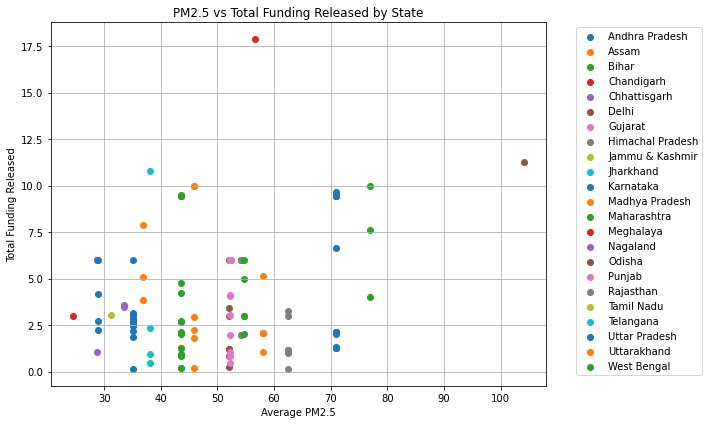

In [145]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the NCAP funding data
funding_df = pd.read_csv(r"C:\Users\Anvit\Downloads\NCAP_Funding.csv")

# Load the air quality data from the Excel file
air_quality_df = pd.read_csv(r"C:\Users\Anvit\Downloads\Data (1).csv")  # Replace with your file name

# Display the first few rows of the air quality data
print(air_quality_df.head())
# Example: Aggregate PM2.5 and PM10 data by state
state_air_quality = air_quality_df.groupby('state').agg({
    'PM2.5': 'mean',  # Average PM2.5 by state
    'PM10': 'mean'    # Average PM10 by state
}).reset_index()

# Display the aggregated air quality data
print(state_air_quality.head())

# Merge air quality data with funding data
merged_df = pd.merge(funding_df, state_air_quality, left_on='State', right_on='state', how='left')

# Display the merged data
print(merged_df.head())

# Example: Scatter plot of PM2.5 vs Total Funding Released
plt.figure(figsize=(10, 6))
for state in merged_df['State'].unique():
    plt.scatter(merged_df[merged_df['State'] == state]['PM2.5'],
                merged_df[merged_df['State'] == state]['Total fund released'],
                label=state)

plt.xlabel('Average PM2.5')
plt.ylabel('Total Funding Released')
plt.title('PM2.5 vs Total Funding Released by State')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


## Miscallaneous

In [74]:
# Q1

import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv(r"C:\Users\Anvit\Downloads\Data (1).csv")

data_2023 = data[(data["Timestamp"] >= "2023") & (data["Timestamp"] < "2024")]   
data_2023

mean_pm2_city = data_2023.groupby("city")["PM2.5"].mean()   
print(f"City {mean_pm2_city.idxmax()} was the most polluted city in 2023 with average PM2.5 level of {mean_pm2_city.max()}")

City Darbhanga was the most polluted city in 2023 with average PM2.5 level of 242.91703203305735


In [78]:
pm2_darbhanga_2023 = data_2023[data_2023["city"] == "Darbhanga"]["PM2.5"]  
hazardou_days_darbhanga = pm2_darbhanga_2023[pm2_darbhanga_2023 > 300]
percent_hazardous_days = (hazardou_days_darbhanga.count() / pm2_darbhanga_2023.count()) * 100

print(f"Most polluted city {mean_pm2_bycity.idxmax()} has {percent_hazardous_days:.2f} % of days with hazardous levels of PM2.5")

Most polluted city Darbhanga has 23.08 % of days with hazardous levels of PM2.5


In [79]:
#Q2
data_2018_2020 = data[(data["Timestamp"] >= "2018") & (data["Timestamp"] < "2021")]
delhi_18_20 = data_2018_2020[data["state"] == "Delhi"]
delhi_18_20

<ipython-input-79-8549ff5abc42>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  delhi_18_20 = data_2018_2020[data["state"] == "Delhi"]


,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
204772,2018-01-01,"Alipur, Delhi - DPCC",NaN,NaN,Mahatma Gandhi Insititute for Combating Climat...,Delhi,28.815329,77.153010,Delhi
204775,2018-01-01,"Anand Vihar, Delhi - DPCC",481.625000,572.450000,NaN,Delhi,28.647622,77.315809,Delhi
204783,2018-01-01,"Ashok Vihar, Delhi - DPCC",NaN,NaN,NaN,Delhi,28.695381,77.181665,Delhi
204785,2018-01-01,"Aya Nagar, Delhi - IMD",254.213165,424.537975,NaN,Delhi,28.470691,77.109936,Delhi
204800,2018-01-01,"Bawana, Delhi - DPCC",NaN,NaN,NaN,Delhi,28.776200,77.051074,Delhi
...,...,...,...,...,...,...,...,...,...
819557,2020-12-31,"Sirifort, Delhi - CPCB",211.208791,317.729412,NaN,Delhi,28.550425,77.215938,Delhi
819562,2020-12-31,"Sonia Vihar, Delhi - DPCC",285.536842,404.778947,NaN,Delhi,28.710508,77.249485,Delhi
819563,2020-12-31,"Sri Aurobindo Marg, Delhi - DPCC",218.989583,252.604167,NaN,Delhi,28.531346,77.190156,Delhi
819612,2020-12-31,"Vivek Vihar, Delhi - DPCC",305.042105,416.895833,"Vivek Vihar, 110095",Delhi,28.672342,77.315260,Delhi


<ipython-input-114-8d61802829f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_18_20["Timestamp"] = pd.to_datetime(delhi_18_20["Timestamp"])


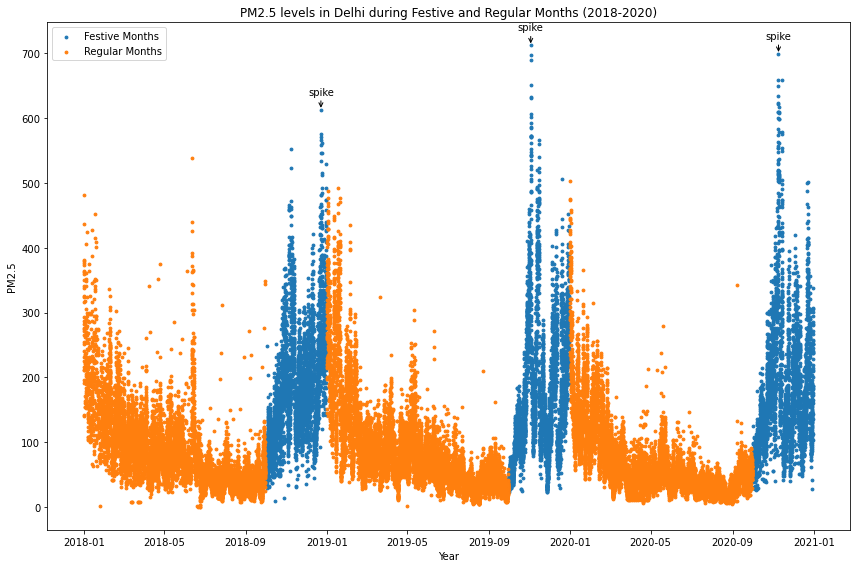

In [114]:
#Q2
delhi_18_20["Timestamp"] = pd.to_datetime(delhi_18_20["Timestamp"])
festive = delhi_18_20[delhi_18_20["Timestamp"].dt.month.isin([10, 11, 12])]   #filtering festive months
delhi_regular = delhi_18_20[delhi_18_20["Timestamp"].dt.month.isin([1, 2, 3, 4, 5, 6, 7, 8, 9])]    #filtering regular months

#plotting the data
plt.figure(figsize=(12, 8))
plt.scatter(festive["Timestamp"], festive["PM2.5"], label="Festive Months", s=8)
plt.scatter(delhi_regular["Timestamp"], delhi_regular["PM2.5"], label="Regular Months", s=8)
plt.xlabel("Year")
plt.ylabel("PM2.5")
plt.title("PM2.5 levels in Delhi during Festive and Regular Months (2018-2020)")
plt.legend()

#mark the spikes
for id_max in festive.groupby(festive["Timestamp"].dt.year)["PM2.5"].idxmax():
    plt.annotate(f"spike", (festive.loc[id_max, "Timestamp"], festive.loc[id_max, "PM2.5"]), textcoords="offset points", xytext=(0, 15), ha='center', arrowprops=dict(facecolor='red',arrowstyle='->'))

plt.tight_layout()
plt.show()


In [83]:
data3= pd.read_csv(r"C:\Users\Anvit\Downloads\NCAP_Funding.csv")
data3.head()



,S. No.,State,City,Amount released during FY 2019-20,Amount released during FY 2020-21,Amount released during FY 2021-22,Total fund released,Utilisation as on June 2022
0,1,Andhra Pradesh,Vijaywada,6,-,-,6.00,22.91
1,2,Andhra Pradesh,Guntur,0.12,0.76,1.96,2.84,22.91
2,3,Andhra Pradesh,Kurnool,0.06,0.76,1.36,2.18,22.91
3,4,Andhra Pradesh,Nellore,0.06,0.76,1.92,2.74,22.91
4,5,Andhra Pradesh,Visakhapatnam,0.12,-,-,0.12,22.91


In [84]:
data3.tail()

,S. No.,State,City,Amount released during FY 2019-20,Amount released during FY 2020-21,Amount released during FY 2021-22,Total fund released,Utilisation as on June 2022
112,113,West Bengal,Kolkata,6,-,-,6.0,19
113,114,West Bengal,Howrah,-,5,-,5.0,19
114,115,West Bengal,Haldia,-,3,-,3.0,19
115,116,West Bengal,Durgapur,-,3,-,3.0,19
116,117,West Bengal,Barrackpore,-,2,-,2.0,19


In [147]:
# Q3
data3["Amount released during FY 2020-21"] = data3["Amount released during FY 2020-21"].astype(str)

data3["Amount released during FY 2020-21"] = data3["Amount released during FY 2020-21"].str.replace("-", "0")

data3["Amount released during FY 2020-21"] = data3["Amount released during FY 2020-21"].astype(float)

state_max_fund_2020 = data3.groupby("State")["Amount released during FY 2020-21"].sum().idxmax()

print(f"State {state_max_fund_2020} received the highest amount of funding in 2020-21.")


State Andhra Pradesh received the highest amount of funding in 2020-21.


<ipython-input-96-ee7d82970769>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ap["Timestamp"] = pd.to_datetime(df_ap["Timestamp"])


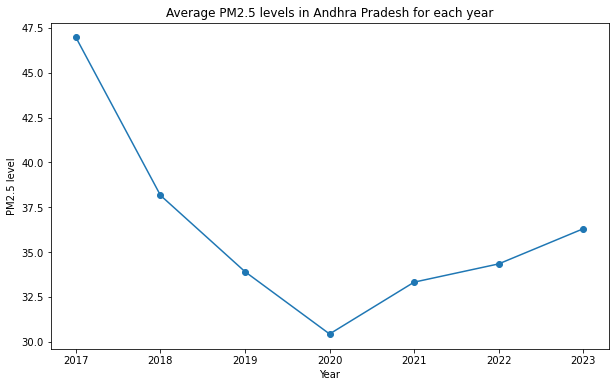

The average PM2.5 levels in Andhra Pradesh have been increasing since it had received the highest funding in 2020-21
This implies that the funding might not have been effective in reducing pollution levels in the state


In [96]:
# Q3
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\Anvit\Downloads\Data (1).csv")
df_ap = df[(df["state"] == "Andhra Pradesh") & (df["Timestamp"] < "2024")]
df_ap["Timestamp"] = pd.to_datetime(df_ap["Timestamp"])

yearly_avg = df_ap.groupby(df_ap["Timestamp"].dt.year)["PM2.5"].mean()  

#plotting average PM2.5 levels in Andhra Pradesh for each year
plt.figure(figsize=(10,6))
plt.plot(yearly_avg.index, yearly_avg.values, marker="o")
plt.xlabel("Year")
plt.ylabel("PM2.5 level")
plt.title("Average PM2.5 levels in Andhra Pradesh for each year")

plt.show()

print("The average PM2.5 levels in Andhra Pradesh have been increasing since it had received the highest funding in 2020-21")
print("This implies that the funding might not have been effective in reducing pollution levels in the state")


In [97]:
%pip install folium



  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 1.1.1
    Uninstalling MarkupSafe-1.1.1:
      Successfully uninstalled MarkupSafe-1.1.1
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.9.1 requires ruamel-yaml, which is not installed.
sphinx 4.0.1 requires Jinja2<3.0,>=2.3, but you have jinja2 3.1.5 which is incompatible.
sphinx 4.0.1 requires MarkupSafe<2.0, but you have markupsafe 2.1.5 which is incompatible.


In [103]:
pip install geopandas fiona


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


air_quality_df = pd.read_csv(R"C:\Users\Anvit\Downloads\Data (1).csv")



india_map = gpd.read_file(R"C:\Users\Anvit\Downloads\in.json")  # Replace with the path to your shapefile


gdf = gpd.GeoDataFrame(
    air_quality_df,
    geometry=gpd.points_from_xy(air_quality_df.longitude, air_quality_df.latitude)
)

# Plot the map of India
fig, ax = plt.subplots(figsize=(12, 8))
india_map.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot the sensor locations on the map
gdf.plot(ax=ax, color='red', marker='o', markersize=50, alpha=0.7, label='Sensor Locations')

# Add labels for the cities (optional)
for x, y, city in zip(gdf.geometry.x, gdf.geometry.y, gdf.city):
    ax.text(x, y, city, fontsize=8, ha='right')

# Add title and legend
plt.title('Sensor Locations in India', fontsize=16)
plt.legend(loc='upper right')

# Show the plot
plt.show()

###### Q1 Tell us something interesting from the dataset that we have not asked. Anything that intrigues you, anything that might be useful to the policymakers. 
Uneven distribution of funding across cities within the same state. While some cities receive significant funding, others receive little to none, even though they may be equally, or more polluted. This raises significant questions about the criteria used for fund allocation and whether or not the most polluted cities are being prioritized effectively.